In [1]:
%load_ext autoreload
%autoreload 2

from src.alien import alien
from src.percolation import Graph
import numpy as np



obj=alien()
X_alien, y_alien=obj.dataset(modify_feature=False)

# X=np.concatenate((X, y[:,None]),axis=1)
# X.shape

n=np.linspace(100, 1000, 1).astype(int)
r=np.linspace(0.18, 0.22, 8)
p=np.linspace(0.19, 0.21, 5)
percolation=Graph(100, n, r, p)
X_perc, y_perc=percolation.dataset(modify_feature=False)


# data = load_wine()
# X = data.data
# y = data.target
# X_perc, y_perc = X, y


### Expection Maximization on alien dataset 

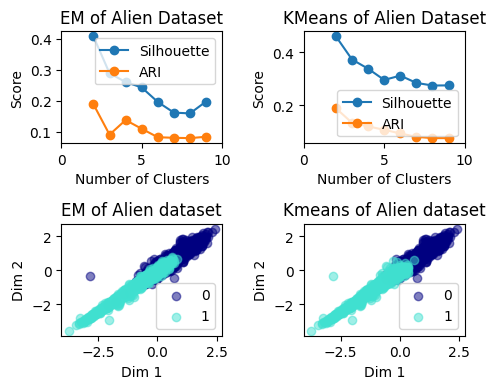

In [2]:
from src.cluster import Cluster
import matplotlib.pyplot as plt

reduction_model=None
n_components=None

X=X_alien
y=y_alien

n_clusters=np.arange(2, 10, 1)




fig = plt.figure(figsize=(5,4))

em=Cluster(model= 'em',n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
labels_em = em.fit(X)
aris_em_alien, sils_em_alien = em.evaluate(X, y,n_clusters)




ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(n_clusters,sils_em_alien, label='Silhouette',marker='o')
plt.plot(n_clusters,aris_em_alien, label='ARI',marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Score")
ax1.legend()
ax1.set_xlim([0, 10])
ax1.set_title('EM of Alien Dataset')


km=Cluster(model= 'km',n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
labels_km = km.fit(X)
aris_km_alien, sils_km_alien = km.evaluate(X, y,n_clusters)

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(n_clusters,sils_km_alien, label='Silhouette',marker='o')
plt.plot(n_clusters,aris_km_alien, label='ARI',marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Score")
ax1.legend()
ax1.set_xlim([0, 10])
ax1.set_title('KMeans of Alien Dataset')




ax1 = fig.add_subplot(2, 2, 3)
colors = ["navy", "turquoise", "darkorange"]

for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
    ax1.scatter(
        X[labels_em == i, 0], X[labels_em == i, 1], color=color, alpha=0.5,  label=target_name
    )
ax1.legend(loc="best", shadow=False, scatterpoints=1)
ax1.set_title("EM of Alien dataset")
# ax1.set_ylim(-6, 6)
# ax1.set_xlim(-6, 6)
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')



ax1 = fig.add_subplot(2, 2, 4)
colors = ["navy", "turquoise", "darkorange"]

for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
    ax1.scatter(
        X[labels_km == i, 0], X[labels_km == i, 1], color=color, alpha=0.5,  label=target_name
    )
ax1.legend(loc="best", shadow=False, scatterpoints=1)
ax1.set_title("Kmeans of Alien dataset")
# ax1.set_ylim(-6, 6)
# ax1.set_xlim(-6, 6)
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 6     # Font size for legend
})

plt.tight_layout() 
plt.savefig('cluster_alien.png',dpi=300)
plt.show()


### clustering on percolation dataset

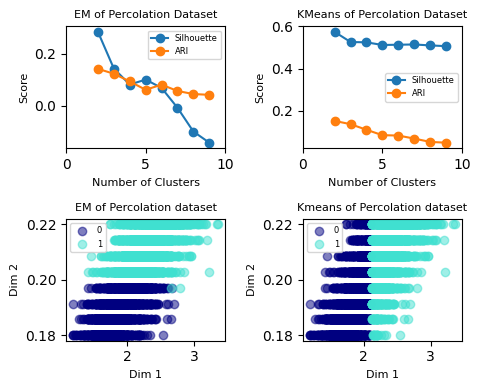

In [3]:
from src.cluster import Cluster
import matplotlib.pyplot as plt

reduction_model=None
n_components=None

X=X_perc
y=y_perc

n_clusters=np.arange(2, 10, 1)




fig = plt.figure(figsize=(5,4))

em=Cluster(model= 'em',n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
labels_em = em.fit(X)
aris_em_perc, sils_em_perc = em.evaluate(X, y,n_clusters)




ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(n_clusters,sils_em_perc, label='Silhouette',marker='o')
plt.plot(n_clusters,aris_em_perc, label='ARI',marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Score")
ax1.legend()
ax1.set_xlim([0, 10])
ax1.set_title('EM of Percolation Dataset')


km=Cluster(model= 'km',n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
labels_km = km.fit(X)
aris_km_perc, sils_km_perc = km.evaluate(X, y,n_clusters)

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(n_clusters,sils_km_perc, label='Silhouette',marker='o')
plt.plot(n_clusters,aris_km_perc, label='ARI',marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Score")
ax1.legend()
ax1.set_xlim([0, 10])
ax1.set_title('KMeans of Percolation Dataset')




ax1 = fig.add_subplot(2, 2, 3)
colors = ["navy", "turquoise", "darkorange"]

for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
    ax1.scatter(
        X[labels_em == i, 0], X[labels_em == i, 2], color=color, alpha=0.5,  label=target_name
    )
ax1.legend(loc="best", shadow=False, scatterpoints=1)
ax1.set_title("EM of Percolation dataset")
# ax1.set_ylim(-6, 6)
# ax1.set_xlim(-6, 6)
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')



ax1 = fig.add_subplot(2, 2, 4)
colors = ["navy", "turquoise", "darkorange"]

for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
    ax1.scatter(
        X[labels_km == i, 0], X[labels_km == i, 2], color=color, alpha=0.5,  label=target_name
    )
ax1.legend(loc="best", shadow=False, scatterpoints=1)
ax1.set_title("Kmeans of Percolation dataset")
# ax1.set_ylim(99, 101)
# ax1.set_xlim(-6, 6)
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 6     # Font size for legend
})

plt.tight_layout() 
plt.savefig('cluster_perc.png',dpi=300)
plt.show()


### find n_components for reduction

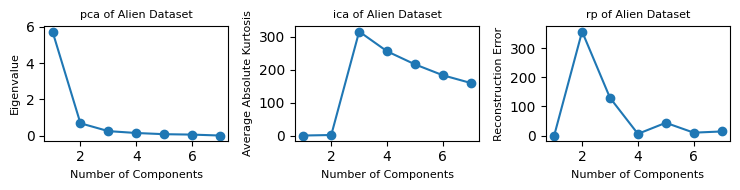

In [4]:
from src.reduction import Reduction

fig = plt.figure(figsize=(7.5,2))

model='pca'
X=X_alien
components_range = range(1, X.shape[1] + 1)
cls=Reduction(model=model,random_state=19)
cls.fit(X)
eigenvalues,cumulative_explained_variance=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(components_range,eigenvalues, marker='o')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Eigenvalue')
ax1.set_title('pca of Alien Dataset')

model='ica' 
cls=Reduction(model=model,random_state=19)
cls.fit(X)
average_kurtosis=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(components_range,average_kurtosis, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Absolute Kurtosis')
ax1.set_title('ica of Alien Dataset')


model='rp' 
cls=Reduction(model=model,n_components=2,random_state=19)
cls.fit(X)
reconstruction_errors=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 3)
ax1.plot(components_range,reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
ax1.set_title('rp of Alien Dataset')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})

plt.tight_layout() 
plt.savefig('reduction_tuning_alien.pdf')
plt.show()

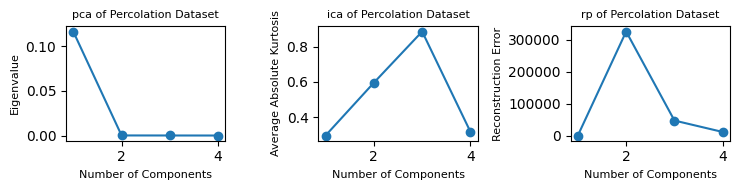

In [5]:
from src.reduction import Reduction

fig = plt.figure(figsize=(7.5,2))

model='pca'
X=X_perc
components_range = range(1, X.shape[1] + 1)
cls=Reduction(model=model,random_state=19)
cls.fit(X)
eigenvalues,cumulative_explained_variance=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(components_range,eigenvalues, marker='o')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Eigenvalue')
ax1.set_title('pca of Percolation Dataset')

model='ica' 
cls=Reduction(model=model,random_state=19)
cls.fit(X)
average_kurtosis=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(components_range,average_kurtosis, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Absolute Kurtosis')
ax1.set_title('ica of Percolation Dataset')


model='rp' 
cls=Reduction(model=model,n_components=2,random_state=19)
cls.fit(X)
reconstruction_errors=cls.evaluate(X)
ax1 = fig.add_subplot(1, 3, 3)
ax1.plot(components_range,reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
ax1.set_title('rp of Percolation Dataset')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})

plt.tight_layout() 
plt.savefig('reduction_tuning_perc.pdf')
plt.show()

### Visulization on clutering results

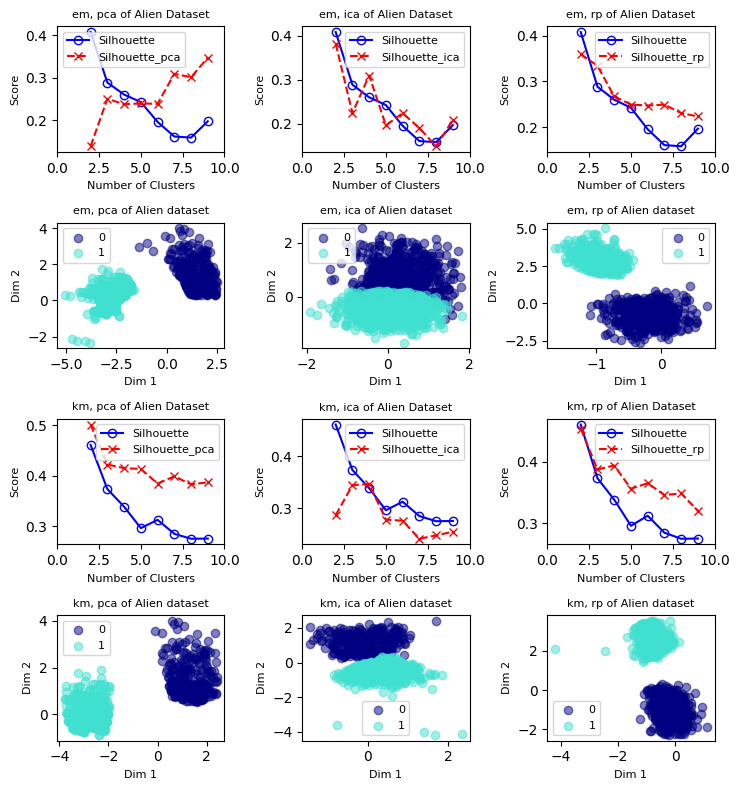

In [6]:

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
from src.reduction import Reduction

fig = plt.figure(figsize=(7.5,8))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)


X = X_alien
y = y_alien

target_names = [0,1]
X_r={}
pca = Reduction("pca",n_components=2)
X_r["pca"] = pca.fit(X)

ica = Reduction("ica",n_components=3)
X_r['ica'] = ica.fit(X)

rp = Reduction("rp",n_components=4)
X_r['rp'] = rp.fit(X)


n_clusters=np.arange(2, 10, 1)


ii=1
jj=4
for model_choice in ['em','km']:
    
    
    for reduction_choice in ["pca","ica","rp"]:

        cls=Cluster(model= model_choice,n_clusters=2, reduction=None, n_components=None,random_state=19)
        
        labels_km_ = cls.fit(X)
        aris2_, sils2_ = cls.evaluate(X, y,n_clusters)
        labels_km = cls.fit(X_r[reduction_choice])
        aris2, sils2 = cls.evaluate(X_r[reduction_choice], y,n_clusters)


        ax1 = fig.add_subplot(4, 3, ii)
        
        ax1.plot(n_clusters,sils2_, label='Silhouette',marker='o',markerfacecolor='none',color='blue')
        # ax1.plot(n_clusters,aris2, label='ARI',marker='o',markerfacecolor='none',color='blue')
        ax1.plot(n_clusters,sils2, label=f'Silhouette_{reduction_choice}',marker='x',linestyle='--',color='red')
        # ax1.plot(n_clusters,aris2_, label=f'ARI_{reduction_choice}',marker='x',linestyle='--',color='blue')
        ax1.set_xlabel("Number of Clusters")
        ax1.set_ylabel("Score")
        ax1.legend()
        ax1.set_xlim([0, 10])
        ax1.set_title(f'{model_choice}, {reduction_choice} of Alien Dataset') 


        
        

        ax1 = fig.add_subplot(4, 3, ii+3)

        colors = ["navy", "turquoise", "darkorange"]

        for color, i, target_name in zip(colors, [0, 1, 2], target_names):
            ax1.scatter(
                X_r[reduction_choice][labels_km == i, 0], X_r[reduction_choice][labels_km == i, 1], color=color, alpha=0.5,  label=target_name
            )
        ax1.legend(loc="best", shadow=False, scatterpoints=1)
        ax1.set_title(f"{model_choice}, {reduction_choice} of Alien dataset")
        # ax1.set_ylim(-6, 6)
        # ax1.set_xlim(-6, 6)
        ax1.set_xlabel('Dim 1')
        ax1.set_ylabel('Dim 2')
        
        

        if ii%3==0:
            ii+=4
        else:
            ii+=1
        
        

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 6     # Font size for legend
})

plt.tight_layout() 
plt.savefig('cluster_reduction_alien.png',dpi=300)
plt.show()



In [7]:
sils2

[0.45431345258113737,
 0.38777606757499145,
 0.3942270871258931,
 0.35643531709423426,
 0.36541954332912785,
 0.34607931271058745,
 0.3487056746147183,
 0.320533803895799]

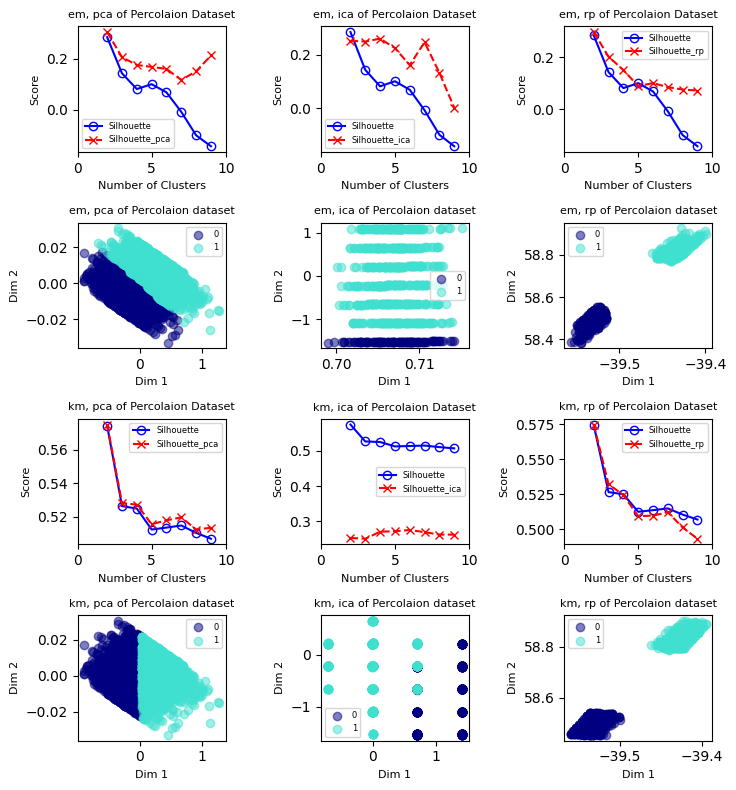

In [8]:

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
from src.reduction import Reduction

fig = plt.figure(figsize=(7.5,8))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

X = X_perc
y = y_perc

# X = X_alien
# y = y_alien

target_names = [0,1]
X_r={}
pca = Reduction("pca",n_components=2)
X_r["pca"] = pca.fit(X)

ica = Reduction("ica",n_components=3)
X_r['ica'] = ica.fit(X)

rp = Reduction("rp",n_components=4)
X_r['rp'] = rp.fit(X)


n_clusters=np.arange(2, 10, 1)


ii=1
jj=4
for model_choice in ['em','km']:
    km=Cluster(model= model_choice,n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
    
    for reduction_choice in ["pca","ica","rp"]:

        labels_km = km.fit(X_r[reduction_choice])
        aris2, sils2 = km.evaluate(X_r[reduction_choice], y, n_clusters)
        labels_km_ = km.fit(X)
        aris2_, sils2_ = km.evaluate(X, y,n_clusters)

        ax1 = fig.add_subplot(4, 3, ii)
        
        ax1.plot(n_clusters,sils2_, label='Silhouette',marker='o',markerfacecolor='none',color='blue')
        # ax1.plot(n_clusters,aris2, label='ARI',marker='o',markerfacecolor='none',color='blue')
        ax1.plot(n_clusters,sils2, label=f'Silhouette_{reduction_choice}',marker='x',linestyle='--',color='red')
        # ax1.plot(n_clusters,aris2_, label=f'ARI_{reduction_choice}',marker='x',linestyle='--',color='blue')
        ax1.set_xlabel("Number of Clusters")
        ax1.set_ylabel("Score")
        ax1.legend()
        ax1.set_xlim([0, 10])
        ax1.set_title(f'{model_choice}, {reduction_choice} of Percolaion Dataset') 


        
        

        ax1 = fig.add_subplot(4, 3, ii+3)

        colors = ["navy", "turquoise", "darkorange"]

        for color, i, target_name in zip(colors, [0, 1, 2], target_names):
            ax1.scatter(
                X_r[reduction_choice][labels_km == i, 0], X_r[reduction_choice][labels_km == i, 1], color=color, alpha=0.5,  label=target_name
            )
        ax1.legend(loc="best", shadow=False, scatterpoints=1)
        ax1.set_title(f"{model_choice}, {reduction_choice} of Percolaion dataset")
        # ax1.set_ylim(-6, 6)
        # ax1.set_xlim(-6, 6)
        ax1.set_xlabel('Dim 1')
        ax1.set_ylabel('Dim 2')
        
        

        if ii%3==0:
            ii+=4
        else:
            ii+=1
        
        

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 6     # Font size for legend
})

plt.tight_layout() 
plt.savefig('cluster_reduction_perc.png',dpi=300)
plt.show()



Time taken: 3.5462307929992676


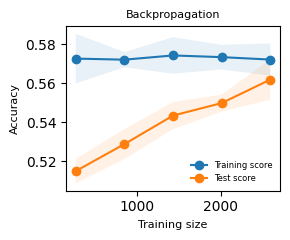

In [9]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from time import time


X = X_alien
y = y_alien

st=time()


cls=Cluster(model= 'km',n_clusters=2)
labels = cls.fit(X)


# pca = Reduction("pca",n_components=2)
# X = pca.fit(X)

# ica = Reduction("ica",n_components=3)
# X = ica.fit(X)

# rp = Reduction("rp",n_components=4)
# X = rp.fit(X)

X = np.hstack((X, labels[:,None]))

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=19)
# mlp.fit(X, y)

train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3
)

print(f"Time taken: {time()-st}")

fig = plt.figure(figsize=(3,2.5))

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,)
plt.plot(train_sizes, train_scores_mean, label="Training score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Test score",marker='o')
plt.title("Backpropagation")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
# plt.grid(visible=True)
plt.legend(frameon=False)


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})

plt.tight_layout() 
# plt.savefig('figs/accuracy_NN.pdf')
plt.show()

# model_choice='em'
# reduction_model=None
# n_components=None
# cls=Cluster(model= model_choice,n_clusters=2, reduction=reduction_model, n_components=n_components,random_state=19)
# cls.fit(X)

In [10]:
print(f"train score: {train_scores_mean[-1]}, test score: {test_scores_mean[-1]}")



train score: 0.5722179388332048, test score: 0.5619227572300505


In [13]:
X_alien.shape

(3892, 7)

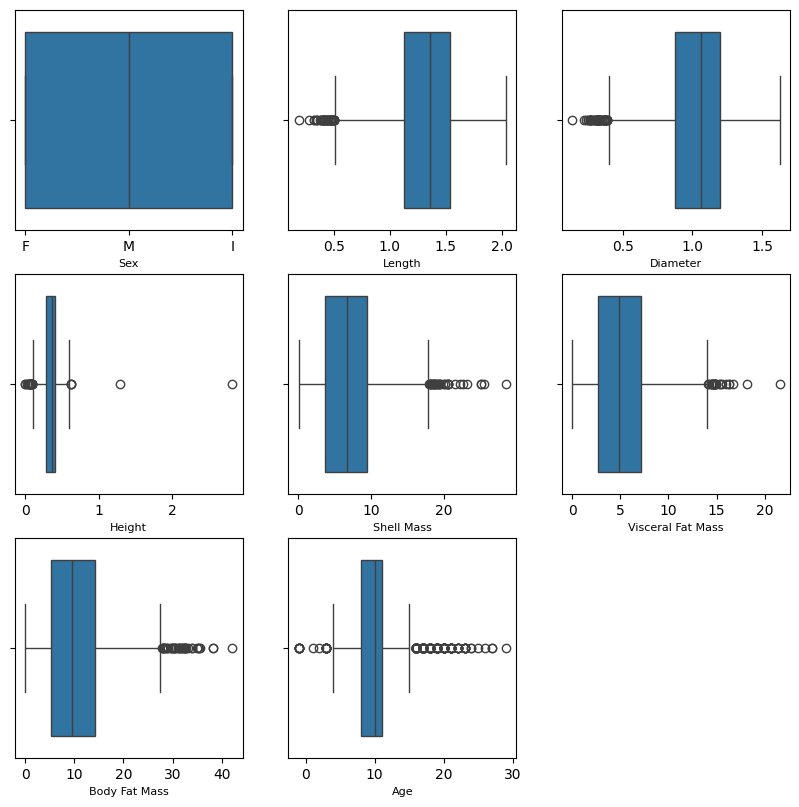

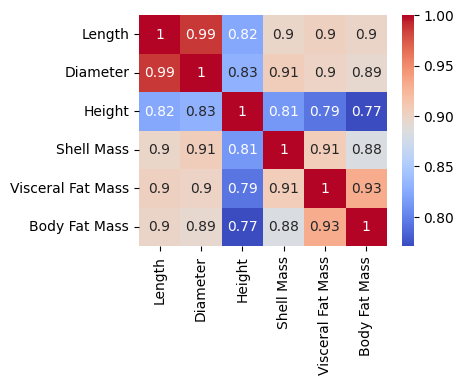

In [44]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("src/alien_data.csv")  	
fig = plt.figure(figsize=(10,20))

df = df[df["Diameter"]<100]
for col in range(len(df.columns)):
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[:,col])
plt.show()


fig = plt.figure(figsize=(4,3))
sns.heatmap(df.iloc[:,1:-1].corr(),annot=True, cmap='coolwarm')
fig.savefig('alien_dataset.png', dpi=300, bbox_inches='tight')